In [48]:
import pandas as pd
df=pd.read_csv("10kdata.csv")
import matplotlib.pyplot as plt
import seaborn as sns

PRINTING THE ORIGINAL DATA FROM 10 - K SHEETS OF DIFFERENT COMPANY AT DIFFERENT YEARS

In [49]:
df

,S.No,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow From Operating Activities
0,1,MICROSOFT,2025,281724,101832,619003,275524,136162
1,2,MICROSOFT,2024,245122,88136,512163,243686,118548
2,3,MICROSOFT,2023,211915,72361,411976,205753,87582
3,4,TESLA,2025,94827,3855,137806,54941,14747
4,5,TESLA,2024,97690,7153,122070,48390,14923
5,6,TESLA,2023,96773,14974,106618,43009,13256
6,7,APPLE,2025,416161,112010,359241,285508,111482
7,8,APPLE,2024,391035,93736,364980,308030,118254
8,9,APPLE,2023,383285,96995,352583,290437,110543


In [50]:
df = df.sort_values(['Company', 'Year'])

df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow From Operating Activities'].pct_change() * 100
df


,S.No,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow From Operating Activities,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,9,APPLE,2023,383285,96995,352583,290437,110543,NaN,NaN,NaN,NaN,NaN
7,8,APPLE,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
6,7,APPLE,2025,416161,112010,359241,285508,111482,6.425512,19.495178,-1.572415,-7.311625,-5.726656
2,3,MICROSOFT,2023,211915,72361,411976,205753,87582,NaN,NaN,NaN,NaN,NaN
1,2,MICROSOFT,2024,245122,88136,512163,243686,118548,15.669962,21.800417,24.318650,18.436183,35.356580
0,1,MICROSOFT,2025,281724,101832,619003,275524,136162,14.932156,15.539621,20.860546,13.065174,14.858117
5,6,TESLA,2023,96773,14974,106618,43009,13256,NaN,NaN,NaN,NaN,NaN
4,5,TESLA,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,14.492862,12.511335,12.575438
3,4,TESLA,2025,94827,3855,137806,54941,14747,-2.930699,-46.106529,12.890964,13.537921,-1.179388


In [ ]:
df.to_csv("trendsdata.csv")

In [51]:
summary = df.groupby('Company').agg(
    {"Revenue Growth (%)":"mean",
     "Net Income Growth (%)":"mean",
     "Asset Growth (%)":"mean",
     "Liabilities Growth (%)":"mean",
     "Cash Flow Growth (%)":"mean"}).reset_index()

In [52]:
print(summary.to_string(index=False))

  Company  Revenue Growth (%)  Net Income Growth (%)  Asset Growth (%)  Liabilities Growth (%)  Cash Flow Growth (%)
    APPLE            4.223753               8.067605          0.971818               -0.627101              0.624455
MICROSOFT           15.301059              18.670019         22.589598               15.750679             25.107348
    TESLA           -0.991560             -49.168531         13.691913               13.024628              5.698025


In [53]:
summary.to_csv("summary_trends_data.csv")

In [54]:
summary_stats = df.groupby('Company').agg({
'Total Revenue': ['mean', 'std'],
'Net Income': ['mean', 'std'],
'Total Assets': ['mean', 'std'],
'Total Liabilities': ['mean', 'std'],
'Cash Flow From Operating Activities': ['mean', 'std']
})
print(summary_stats.to_string (index=False))

Total Revenue                 Net Income               Total Assets               Total Liabilities              Cash Flow From Operating Activities             
         mean          std          mean          std          mean           std              mean          std                                mean          std
396827.000000 17186.282088 100913.666667  9746.883109 358934.666667   6204.174589     294658.333333 11839.546543                       113426.333333  4207.161078
246253.666667 34918.256290  87443.000000 14747.716671 514380.666667 103531.315148     241654.333333 34929.842003                       114097.333333 24593.910330
 96430.000000  1461.994870   8660.666667  5710.764777 122164.666667  15594.215509      48780.000000  5975.552778                        14308.666667   915.873536


In [55]:
print(df.columns.tolist())

['S.No', 'Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow From Operating Activities', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']


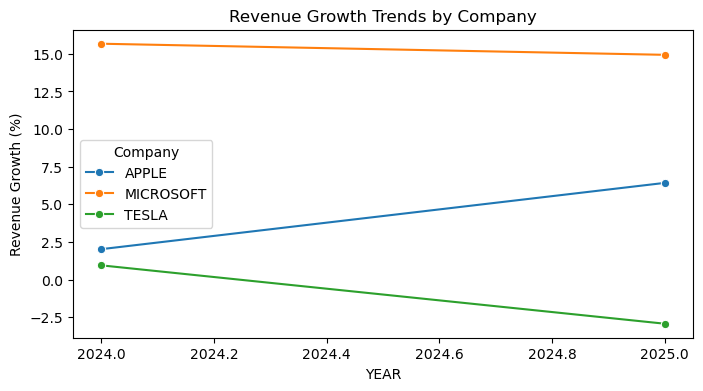

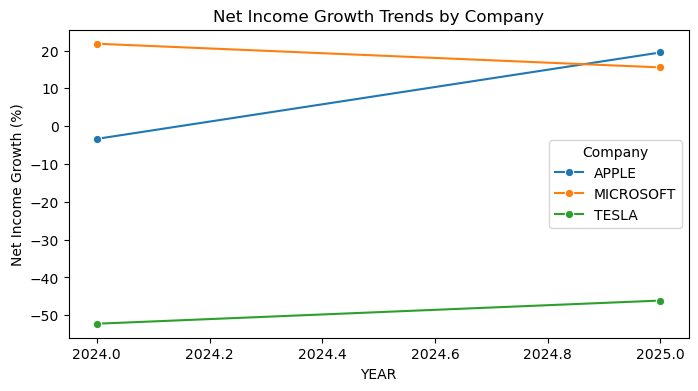

In [56]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year', y='Revenue Growth (%)',hue='Company',marker='o')
plt.title('Revenue Growth Trends by Company')
plt.xlabel('YEAR')
plt.ylabel('Revenue Growth (%)')
plt.legend(title='Company')
plt.show()
# Plotting net income growth for each company
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year', y='Net Income Growth (%)',hue='Company',marker='o')
plt.title('Net Income Growth Trends by Company')
plt.xlabel('YEAR')
plt.ylabel('Net Income Growth (%)')
plt.legend (title='Company')
plt.show()